# **Generación imágenes**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import warnings
warnings.filterwarnings('ignore')

In [2]:
import glob

ImagesFinal = []

for k in range(1,5):
  carpeta = f'/Imagenes Lentes/1E0{k}/'
  archivos = glob.glob(carpeta + '*.fits')

  i = 0
  for j in archivos:
    F = fits.open(archivos[i])
    Data = F[0].data
    ImagesFinal.append(Data)
    i += 1
    if i == 500: break

len(ImagesFinal), ImagesFinal[0].shape

(2000, (512, 512))

In [3]:
Num = ['09','10','11','12','13','14','15']

for k in Num:
  carpeta = f'/Imagenes Lentes/1E{k}/'
  archivos = glob.glob(carpeta + '*.fits')

  i = 0
  for j in archivos:
    F = fits.open(archivos[i])
    Data = F[0].data
    ImagesFinal.append(Data)
    i += 1
    if i == 500: break

len(ImagesFinal), ImagesFinal[0].shape

(5500, (512, 512))

In [4]:
ArregloImagenes = np.array(ImagesFinal)
ArregloImagenes.shape

(5500, 512, 512)

In [5]:
output_filename = '/Imagenes Lentes/ImagenesTotales.npy'
np.save(output_filename, ArregloImagenes)

print('Archivo guardado en /Imagenes Lentes/ImagenesTotales.npy')

hdu = fits.PrimaryHDU(ArregloImagenes)
hdul = fits.HDUList([hdu])
output_filename = '/Imagenes Lentes/ImagenesTotales.fits'
hdul.writeto(output_filename, overwrite=True)
print('Archivo guardado en /Imagenes Lentes/ImagenesTotales.fits')

Archivo guardado en /Imagenes Lentes/ImagenesTotales.npy
Archivo guardado en /Imagenes Lentes/ImagenesTotales.fits


In [6]:
Labels00 = np.zeros(2000)
Labels01 = np.ones(3500)

In [7]:
len(Labels00), Labels00.shape, Labels00

(2000, (2000,), array([0., 0., 0., ..., 0., 0., 0.]))

In [8]:
len(Labels01), Labels01.shape, Labels01

(3500, (3500,), array([1., 1., 1., ..., 1., 1., 1.]))

In [9]:
LabelsFinal = np.concatenate([Labels00, Labels01])
len(LabelsFinal), LabelsFinal.shape, LabelsFinal

(5500, (5500,), array([0., 0., 0., ..., 1., 1., 1.]))

In [10]:
output_filename = '/Imagenes Lentes/Labels.npy'
np.save(output_filename, LabelsFinal)
print('Archivo guardado en /Imagenes Lentes/Labels.npy')

Archivo guardado en /Imagenes Lentes/Labels.npy


# **Visualización imágenes**


In [2]:
Imagenes = np.load('/content/drive/MyDrive/Carpetas Universidad/Colab Notebooks/Imagenes Lentes/ImagenesTotales.npy')

Imagen número 4302
Imagen con efecto de lente.


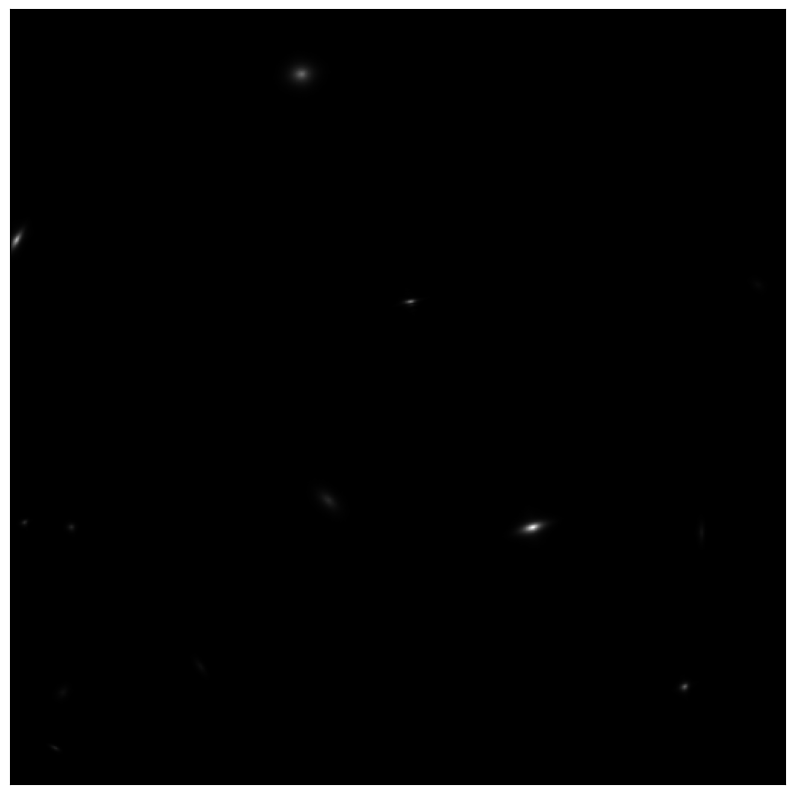

In [6]:
i = int(np.random.rand(1)*5500)
print(f'Imagen número {i}')

if i/500 < 4: print('Imagen sin efecto de lente.')
else: print('Imagen con efecto de lente.')

plt.figure(figsize = (10,12))
plt.imshow(Imagenes[i], origin = 'lower', cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

#3238 5234 4020 5435 70 2109 5102 393 1060 1700 1398 4240 2466

In [4]:
Fits = '/content/drive/MyDrive/Carpetas Universidad/Colab Notebooks/Imagenes Lentes/ImagenesTotales.fits'

Imagen número 4302
Imagen con efecto de lente.


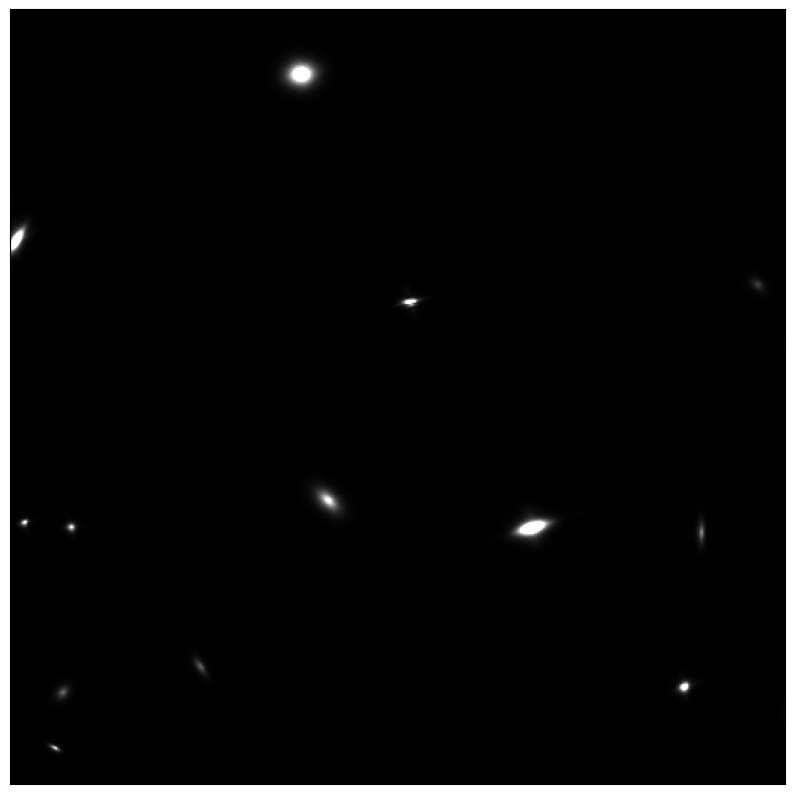

In [7]:
print(f'Imagen número {i}')

if i/500 < 4: print('Imagen sin efecto de lente.')
else: print('Imagen con efecto de lente.')

I = fits.open(Fits)
ImagenFits = I[0].data[i]

Percentile_low = np.percentile(ImagenFits, 80)
Percentile_high = np.percentile(ImagenFits, 99.9)

ImagenFitsClipped = np.clip(ImagenFits, Percentile_low, Percentile_high)

plt.figure(figsize=(10, 12))
plt.imshow(ImagenFitsClipped, origin='lower', cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()